NETFLIX STOCK PRICE PREDICTION MODEL

IMPORTING LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

READING THE DATASET

In [62]:
df = pd.read_csv(r'C:\Users\KIIT\Downloads\NFLX (1).csv')

In [63]:
cpy_df = df.copy()

VIEWING THE DATASET

In [64]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [65]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [66]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


TRAINING AND TESTING THE MODEL

In [67]:
train, test = train_test_split(df, test_size= 0.20)

In [68]:
test_pred = test.copy()

In [69]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
480,2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
633,2020-08-11,479.750000,480.920013,466.549988,466.929993,466.929993,7329200
515,2020-02-24,364.760010,372.820007,361.000000,368.700012,368.700012,6936400
125,2018-08-03,347.750000,347.859985,338.480011,343.089996,343.089996,8848400
148,2018-09-06,347.440002,356.000000,341.989990,346.459991,346.459991,13050200
571,2020-05-13,435.690002,447.000000,427.269989,438.269989,438.269989,7014600
542,2020-04-01,376.049988,380.230011,361.019989,364.079987,364.079987,6672500
86,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700
979,2021-12-23,616.400024,616.880005,607.570007,614.090027,614.090027,1621100
784,2021-03-18,516.400024,517.900024,503.850006,504.790009,504.790009,4094500


In [70]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
238,2019-01-16,354.000000,358.850006,348.109985,351.390015,351.390015,15385500
343,2019-06-18,355.570007,361.500000,353.750000,357.119995,357.119995,5428500
427,2019-10-16,283.119995,288.170013,280.739990,286.279999,286.279999,16175900
617,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300
147,2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800
228,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
429,2019-10-18,289.359985,290.899994,273.359985,275.299988,275.299988,23429900
159,2018-09-21,366.589996,372.220001,360.739990,361.190002,361.190002,11930600
88,2018-06-12,363.600006,365.980011,362.000000,363.829987,363.829987,4291000
988,2022-01-06,554.340027,563.359985,542.010010,553.289978,553.289978,5711800


In [71]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [72]:
y_train = train['Close'].values
y_test = test['Close'].values

In [73]:
def style():
    plt.figure(facecolor='black', figsize=(9,4))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")     

In [74]:
cpy_df['Date']=pd.to_datetime(cpy_df['Date'],format='%Y-%m-%d')

In [75]:
data = pd.DataFrame(cpy_df[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


CLOSE PRICE DATA VISUALISATION

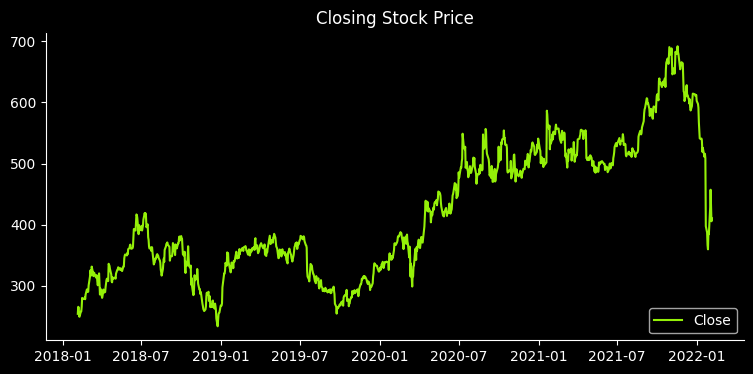

In [76]:
style()
plt.title('Closing Stock Price', color="white")
plt.plot(cpy_df.Date, cpy_df.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

DECISION TREE REGRESSOR MODEL

In [77]:
dtr = DecisionTreeRegressor(max_depth= 4)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [78]:
dtr_pred = dtr.predict(x_test)
dtr_pred

array([347.87011267, 347.87011267, 289.73373097, 489.06778916,
       369.44291608, 265.85472278, 289.73373097, 369.44291608,
       369.44291608, 542.07123558, 347.87011267, 489.06778916,
       369.44291608, 489.06778916, 347.87011267, 369.44291608,
       542.07123558, 585.71428867, 513.31903408, 489.06778916,
       347.87011267, 489.06778916, 421.24576973, 489.06778916,
       347.87011267, 395.55928914, 265.85472278, 289.73373097,
       347.87011267, 347.87011267, 325.75967105, 347.87011267,
       369.44291608, 513.31903408, 369.44291608, 289.73373097,
       513.31903408, 513.31903408, 489.06778916, 347.87011267,
       489.06778916, 309.70666605, 513.31903408, 347.87011267,
       289.73373097, 585.71428867, 489.06778916, 289.73373097,
       309.70666605, 513.31903408, 395.55928914, 445.6068185 ,
       638.21499207, 542.07123558, 289.73373097, 369.44291608,
       542.07123558, 671.55937569, 289.73373097, 542.07123558,
       347.87011267, 325.75967105, 369.44291608, 325.75

DATA VISUALIZATION OF DECISION TREE REGRESSION MODEL PREDICTED PRICE.

Text(0, 0.5, 'Stock Price')

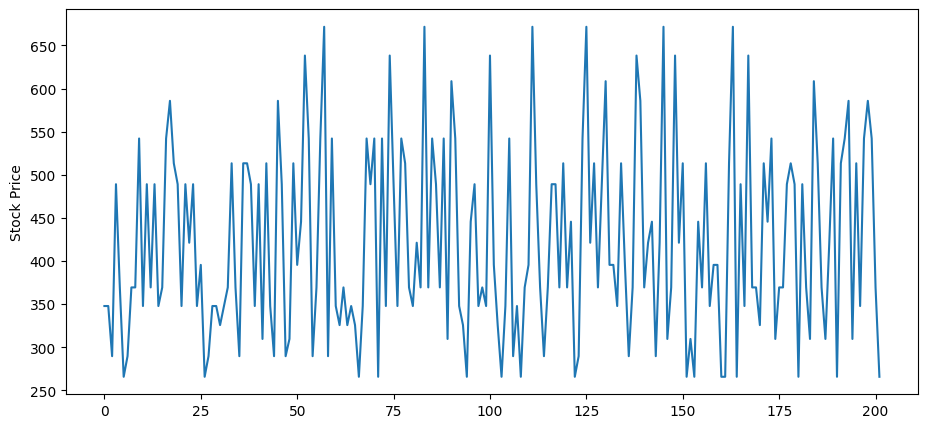

In [95]:
plt.figure(figsize=(11,5))
plt.plot(dtr_pred)
plt.ylabel('Stock Price')

DECISION TREE REGRESSOR MODEL EVALUATION

In [80]:
print("MSE",round(mean_squared_error(y_test,dtr_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,dtr_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,dtr_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,dtr_pred), 3))
print("R2 Score : ", round(r2_score(y_test,dtr_pred), 3))

MSE 105.072
RMSE 10.25
MAE 8.112
MAPE 0.021
R2 Score :  0.991


DECISION TREE REGRESSION MODEL VS ACTUAL DATA VISUALISATION

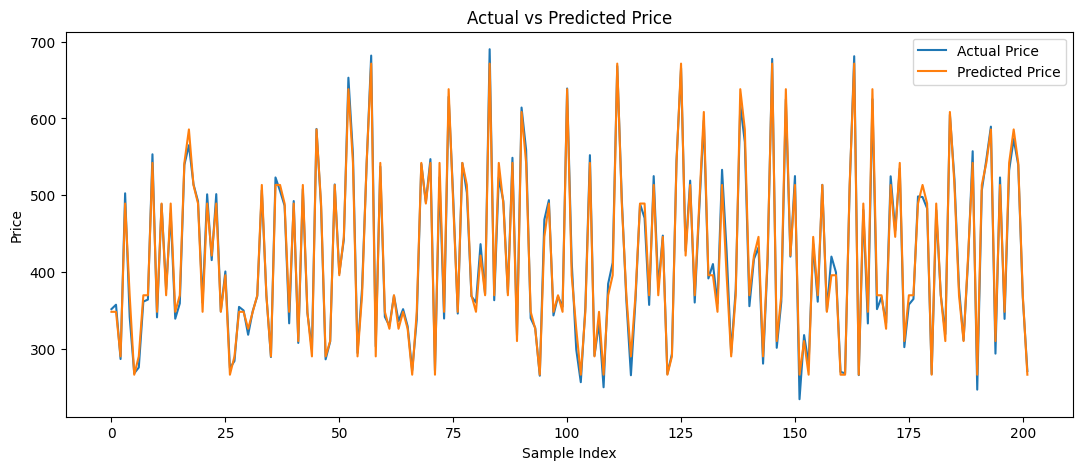

In [97]:
plt.figure(figsize=(13,5))
plt.plot(y_test, label='Actual Price')
plt.plot(dtr_pred, label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

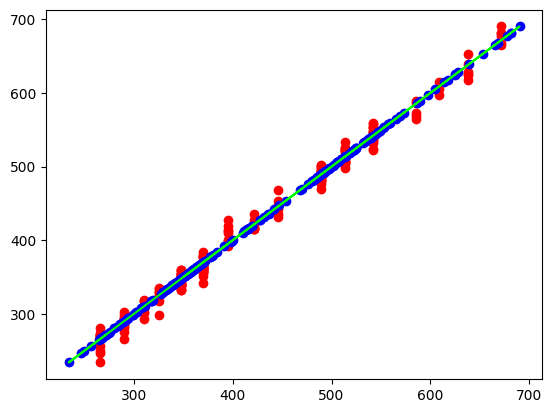

In [82]:
plt.scatter(dtr_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

LINEAR REGRESSION MODEL

In [83]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [84]:
lrm_pred = lrm.predict(x_test)
lrm_pred

array([354.02388058, 359.043404  , 286.23328735, 497.8761036 ,
       343.857706  , 266.06697491, 279.16469827, 367.00864977,
       364.38961294, 551.64290552, 338.82162796, 488.40593432,
       377.77047397, 480.00188807, 339.02882528, 361.46131799,
       540.80032402, 569.53539069, 515.5802941 , 491.79413281,
       358.23170224, 500.52263234, 422.93024015, 500.84492505,
       348.87662958, 398.06699011, 275.50043277, 284.79060798,
       352.88572506, 346.76587252, 322.62720883, 352.61120707,
       367.91837337, 509.13473058, 365.1695784 , 285.5973583 ,
       525.04226277, 506.5135525 , 490.14403551, 341.03191291,
       492.67247775, 309.2201997 , 502.57031278, 353.23015331,
       298.46387199, 582.44590055, 485.10126607, 282.78911603,
       314.06388144, 516.01988996, 391.63530607, 441.47012786,
       648.79366666, 552.64972398, 293.41251148, 379.51009904,
       541.3673073 , 682.01869598, 300.86010872, 534.44298967,
       345.35742428, 325.98421698, 362.20497129, 331.76

LINEAR REGRESSION MODEL EVALUATION

In [85]:
print("MSE",round(mean_squared_error(y_test,lrm_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,lrm_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,lrm_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,lrm_pred), 3))
print("R2 Score : ", round(r2_score(y_test,lrm_pred), 3))

MSE 18.144
RMSE 4.26
MAE 3.021
MAPE 0.008
R2 Score :  0.999


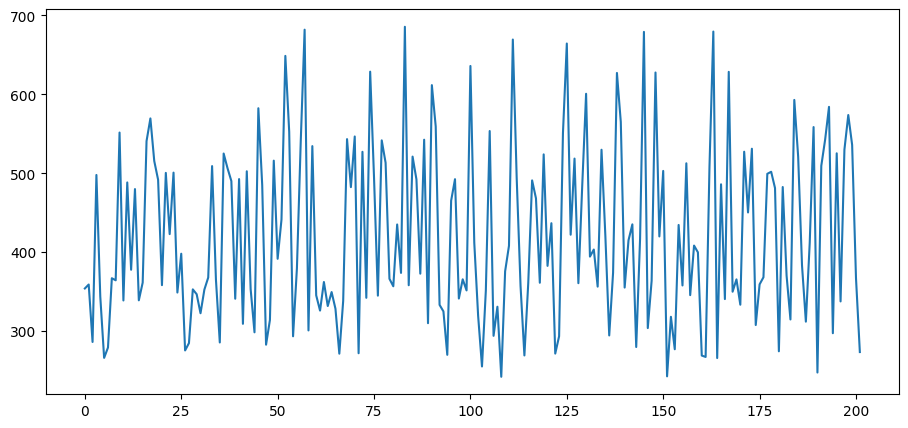

In [98]:
plt.figure(figsize=(11,5))
plt.plot(lrm_pred)


PREDICTED PRICE DATA VISUALISATION USING LINEAR REGRESSION.

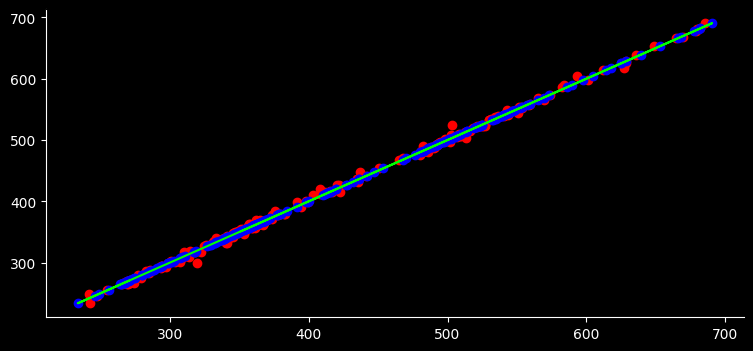

In [87]:
style()

plt.scatter(lrm_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [88]:
test_pred['lrm_Prediction'] = lrm_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,lrm_Prediction
238,2019-01-16,354.000000,358.850006,348.109985,351.390015,351.390015,15385500,354.023881
343,2019-06-18,355.570007,361.500000,353.750000,357.119995,357.119995,5428500,359.043404
427,2019-10-16,283.119995,288.170013,280.739990,286.279999,286.279999,16175900,286.233287
617,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300,497.876104
147,2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800,343.857706
...,...,...,...,...,...,...,...,...
868,2021-07-19,526.049988,534.909973,522.239990,532.280029,532.280029,3885800,530.033566
913,2021-09-21,578.309998,581.880005,569.369995,573.140015,573.140015,2250900,573.848645
794,2021-04-01,529.929993,540.500000,527.030029,539.419983,539.419983,3938600,535.994609
362,2019-07-16,370.089996,371.339996,364.920013,365.989990,365.989990,5863200,367.201941


In [89]:
test_pred[['Close', 'lrm_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,421.157474,111.314209,233.880005,338.965011,382.144989,509.242508,690.309998
lrm_Prediction,202.0,420.990600,110.820518,242.112168,339.418105,382.975245,509.393809,685.692743


TEST DATASET SHOWING THE CLOSING VALUE, LRM_PREDICTED VALUE & DRM_PREDICTED VALUES.

In [90]:
test_pred['drm_prediction'] = dtr_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,lrm_Prediction,drm_prediction
238,2019-01-16,354.000000,358.850006,348.109985,351.390015,351.390015,15385500,354.023881,347.870113
343,2019-06-18,355.570007,361.500000,353.750000,357.119995,357.119995,5428500,359.043404,347.870113
427,2019-10-16,283.119995,288.170013,280.739990,286.279999,286.279999,16175900,286.233287,289.733731
617,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300,497.876104,489.067789
147,2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800,343.857706,369.442916
...,...,...,...,...,...,...,...,...,...
868,2021-07-19,526.049988,534.909973,522.239990,532.280029,532.280029,3885800,530.033566,542.071236
913,2021-09-21,578.309998,581.880005,569.369995,573.140015,573.140015,2250900,573.848645,585.714289
794,2021-04-01,529.929993,540.500000,527.030029,539.419983,539.419983,3938600,535.994609,542.071236
362,2019-07-16,370.089996,371.339996,364.920013,365.989990,365.989990,5863200,367.201941,369.442916


COMPARISON OF BOTH THE MODELS

In [91]:
test_pred[['lrm_Prediction','drm_prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
lrm_Prediction,202.0,420.990600,110.820518,242.112168,339.418105,382.975245,509.393809,685.692743
drm_prediction,202.0,421.731897,110.291143,265.854723,347.870113,369.442916,513.319034,671.559376


LINAER REGRESSION MODEL VS ACTUAL PRICE VISUALISATION

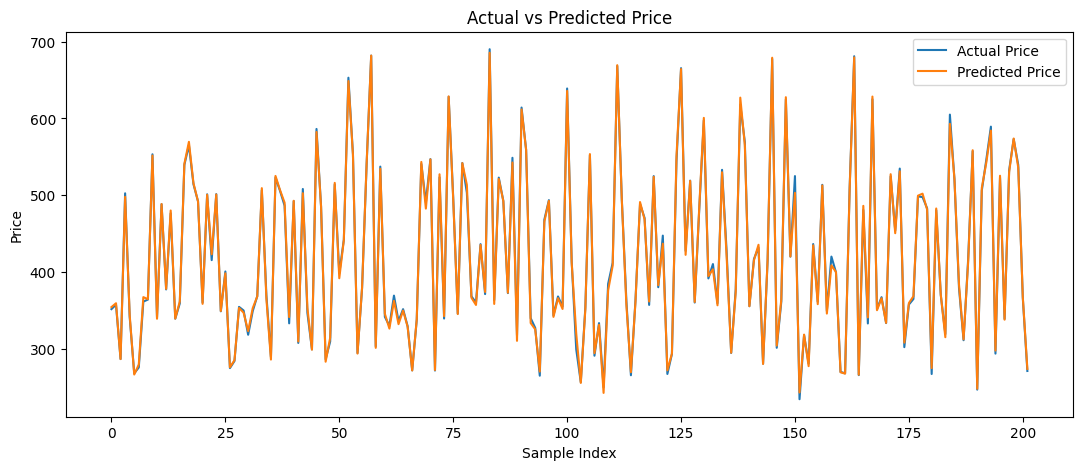

In [99]:
plt.figure(figsize=(13,5))
plt.plot(y_test, label='Actual Price')
plt.plot(lrm_pred, label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

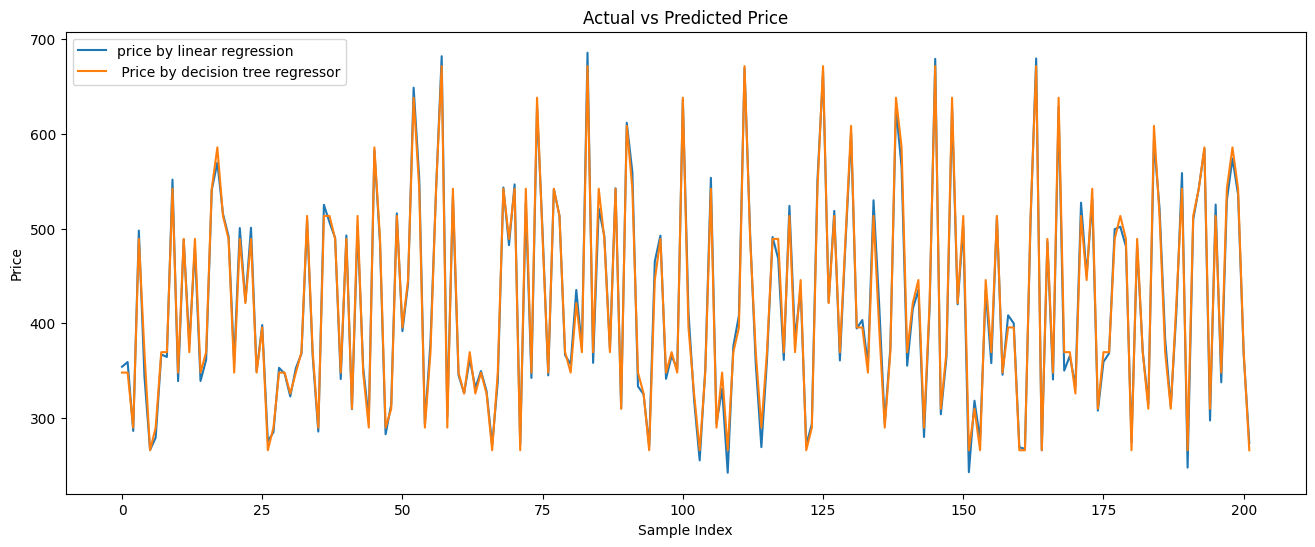

In [100]:
plt.figure(figsize=(16,6))
plt.plot(lrm_pred, label='price by linear regression')
plt.plot(dtr_pred, label=' Price by decision tree regressor')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

COMPARISON OF LINEAR REGRESSION MODEL & DECISION TREE REGRESSION MODEL.

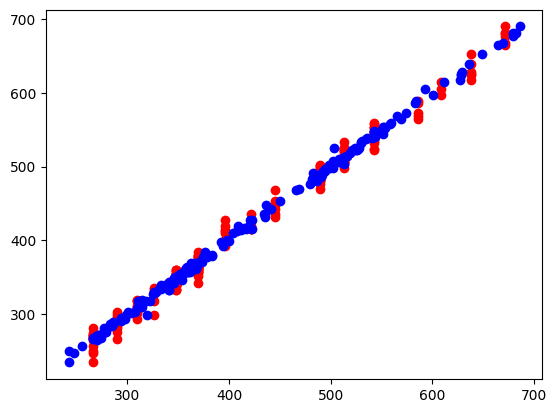

In [94]:
plt.scatter(dtr_pred, y_test, color='red', marker='o')
plt.scatter(lrm_pred, y_test, color='blue', marker='o')